In [8]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from definitions import RAW_DATA_DIR
from src.data.indicators import rsi, stochRSI, ema
from src.models.strategies import RSIStoch200EMA, BuyAndHold

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
btcusdt = pd.read_csv(RAW_DATA_DIR / 'BTCUSDT.csv')
btcusdt.index = pd.DatetimeIndex(btcusdt['open time'])

btcusdt['rsi'] = rsi(ohlc=btcusdt, period=14)
btcusdt['stoch_k'], btcusdt['stoch_d'] = stochRSI(
    ohlc=btcusdt, period=14, smoothK=3, smoothD=3
)
btcusdt['ema'] = ema(ohlc=btcusdt, period=200)

In [6]:
strategy = RSIStoch200EMA(
    max_number_open_trades=3,
    min_period_to_last_low=5,
    max_period_to_last_low=50,
    min_absolute_slope_rsi=0.2,
    swing_low_margin=2
)

results = strategy.apply(
    ohlcv_timeseries=btcusdt.iloc[:1500],
    asset_name='BTCUSDT'
)

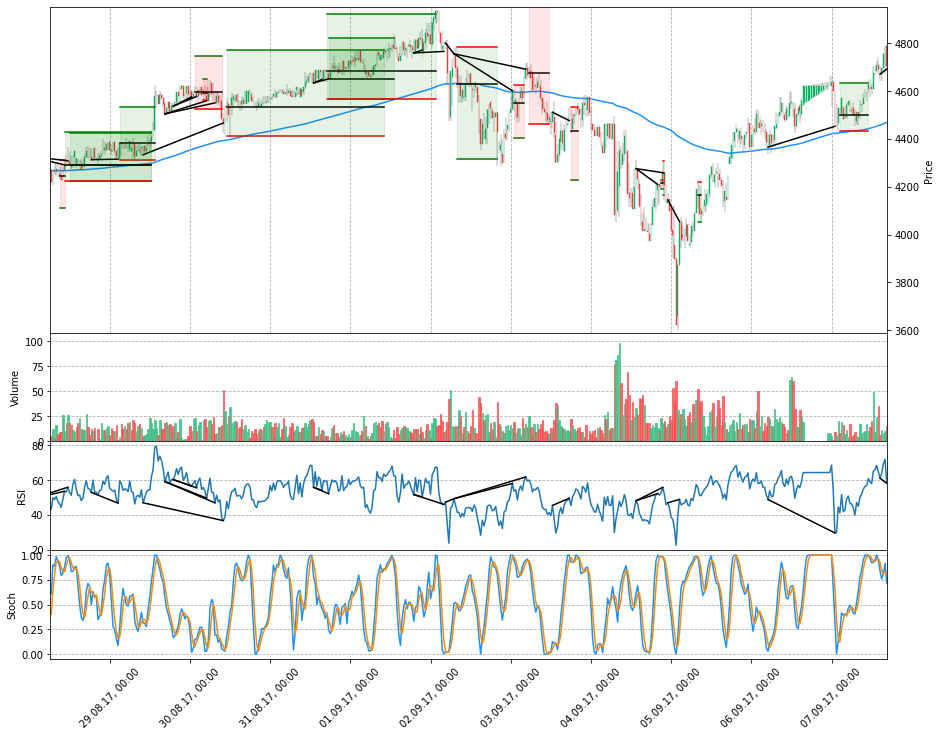

In [7]:
start_time = btcusdt.iloc[500].name
end_time = btcusdt.iloc[1000].name
results.plot(start_time, end_time)

In [11]:
buyandhold_strategy = BuyAndHold()
results = buyandhold_strategy.apply(
    ohlcv_timeseries=btcusdt,
    asset_name='BTCUSDT'
)
results.evaluation()
results.pnl

[autoreload of src.models.strategies failed: Traceback (most recent call last):
  File "c:\users\richard\desktop\codingprojects\cryptotradingbot\ctb\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "c:\users\richard\desktop\codingprojects\cryptotradingbot\ctb\lib\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "c:\users\richard\desktop\codingprojects\cryptotradingbot\ctb\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "c:\users\richard\desktop\codingprojects\cryptotradingbot\ctb\lib\site-packages\IPython\extensions\autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "c:\users\richard\desktop\codingprojects\cryptotradingbot\ctb\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "c:\users\r

7.570517215200358

In [12]:
results.trades

[{'entry_time': Timestamp('2017-08-17 20:30:00'),
  'entry_price': 4346.74,
  'take_profit': 37253.81,
  'stop_loss': 37253.81,
  'exit_time': Timestamp('2021-05-31 23:30:00'),
  'win': True}]

In [ ]:
strategy = RSIStoch200EMA(
    max_number_open_trades=3,
    min_period_to_last_low=5,
    max_period_to_last_low=50,
    min_absolute_slope_rsi=0.2,
    swing_low_margin=2
)

results = strategy.apply(
    ohlcv_timeseries=btcusdt.iloc[:1500],
    asset_name='BTCUSDT'
)

start_time = btcusdt.iloc[500].name
end_time = btcusdt.iloc[1000].name
results.plot(start_time, end_time)